In [1]:
import utils as ut
from pint import UnitRegistry
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from numpy import average as avg
import numpy as np
from matplotlib import pyplot as plt
from functools import partial

/home/pete/src/fcat_biomass/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
sqdb = ut.sqlitedb('fcat_biomass')

In [6]:
wood_dens = ut.gData('138FWlGeW57MKdcz2UkWxtWV4o50SZO8sduB1R6JOFp8', 1297253755)

In [7]:
sathre4 = ut.gData('13UQtRfNBSJ81PXxbYSnB2LrjHePNcvhJhrsxRBjHpoY',546564075, hrow =3)
sathre4.to_sql('so4',sqdb['cx'], if_exists = 'replace')

## Wood products DF with and without logging slash utilization
Using studies from Sathre and O'Connor in the US.

In [8]:
HWu = pd.read_sql('''SELECT *
                        FROM so4
                        WHERE harvestslash = "X"
                        AND processingresidues = "X" 
                        AND "post-usewoodproduct" = "X"
                        AND stumps is null''', sqdb['cx'],index_col = 'index')
HWo = pd.read_sql('''SELECT *
                        FROM so4
                        WHERE harvestslash is null
                        AND processingresidues = "X" 
                        AND stumps is null
                        AND "post-usewoodproduct" = "X"''', sqdb['cx'], index_col = 'index')


In [9]:
#HWo
print tabulate(HWo[['reference','df']], headers = ['index','reference','displacement factor'],tablefmt="pipe")

|   index | reference               |   displacement factor |
|--------:|:------------------------|----------------------:|
|       0 | Eriksson et al. (2007)  |                   1.7 |
|       3 | Eriksson et al. (2007)  |                   2.2 |
|      24 | Salazar and Meil (2009) |                   4.9 |
|      34 | Werner et al. (2005)    |                   1.7 |


In [10]:
#HWu
print tabulate(HWu[['reference','df']], headers = ['index','reference','displacement factor'],tablefmt="pipe")

|   index | reference                 |   displacement factor |
|--------:|:--------------------------|----------------------:|
|       1 | Eriksson et al. (2007)    |                   1.9 |
|       4 | Eriksson et al. (2007)    |                   2.5 |
|       6 | Gustavsson et al. (2006)  |                   4   |
|       7 | Gustavsson et al. (2006)  |                   5.6 |
|       8 | Gustavsson et al. (2006)  |                   2.2 |
|       9 | Gustavsson et al. (2006)  |                   3.3 |
|      22 | Pingoud and Perala (2000) |                   3.2 |


In [11]:
constants = {'me' : {'value':0.5,
                     'desc': 'Mill Efficiency'},
             'DFu' : {'value': np.average(HWu.df),
                      'desc': 'Displacement factor with logging residual utilization',
                      'source': '''\cite{Sathre2010}'''},
             'DFo' : {'value': np.average(HWo.df),
                      'desc': 'Displacement factor without logging residual utilization'},
             'wDens' : {'value': sum(wood_dens.pct/100 * wood_dens.density_lbscuft),
                        'units' : 'lbs/cuft',
                        'desc': 'average harvested wood density weighted by species harvested',
                        'source': '\cite{Mciver2012}'}
             }

In [32]:
constants['wDens']['value']

27.940920999860715

### Timber Products Output
The TPO estimates logging redisues produced from commercial timber harvesting operations. The follwoing is in million cubic feet (MCF)

In [18]:
tpoData = ut.gData('1GDdquzrCoq2cxVN2fbCpP4gwi2yrMnONNrWbfhZKZu4', 872275354, hrow=1)
tpoData.to_sql('tpo', sqdb['cx'], if_exists = 'replace')
print tabulate(tpoData, headers = ['Ownership','Roundwood Products','Logging Residues', 'Year'],tablefmt="pipe")

|    | Ownership       |   Roundwood Products |   Logging Residues |   Year |
|---:|:----------------|---------------------:|-------------------:|-------:|
|  0 | National Forest |                 72.4 |               20.7 |   2012 |
|  1 | Other Public    |                 16.2 |                3.4 |   2012 |
|  2 | Forest Industry |                328.9 |               72.4 |   2012 |
|  3 | Other Private   |                 53   |               11.2 |   2012 |
|  4 | National Forest |                 52.8 |               16.3 |   2006 |
|  5 | Other Public    |                  1.1 |                0.3 |   2006 |
|  6 | Forest Industry |                274.3 |               59.6 |   2006 |
|  7 | Other Private   |                139.2 |               33.2 |   2006 |
|  8 | National Forest |                 90.8 |               22.6 |   2000 |
|  9 | Other Public    |                  5.2 |                1.6 |   2000 |
| 10 | Forest Industry |                372.5 |               70

## Board of Equalization Data
The board of equalization

In [34]:
pd.read_csv('boe_hh.csv').to_sql('boe',sqdb['cx'], if_exists = 'replace')

In [35]:
pd.read_sql('select * from boe', sqdb['cx'])

,index,year,total_mmbf,gvt_mmbf,gvt_pct,pvt_mmbf
0,0,1978,4491,1725,0.3840,2766
1,1,1979,3991,1723,0.4320,2268
2,2,1980,3164,1228,0.3880,1936
3,3,1981,2672,950,0.3560,1722
4,4,1982,2318,818,0.3530,1500
5,5,1983,3358,1468,0.4370,1890
6,6,1984,3546,1446,0.4080,2100
7,7,1985,3818,1613,0.4220,2205
8,8,1986,4265,1869,0.4380,2396
9,9,1987,4500,1860,0.4130,2640


### McIver and Morgan annual in cubic

Figure 2 from morgan and mciver presents total roundwood harvest from 1947 through 2012 in MMBF. To convert MMBF to MCF we use a sawlog conversion of 5.44. This is an approximation as the actual sawlog conversion varies with the log size on average over time has changed.

In [19]:
mm_histHarvest = ut.gData('13UQtRfNBSJ81PXxbYSnB2LrjHePNcvhJhrsxRBjHpoY', 2081880100).fillna(value=0)

In [20]:
mm_histHarvest.to_sql('mm_hist', sqdb['cx'], if_exists = 'replace')

In [21]:
mm_histHarvest

,year,private,state,tribal,blm,nat_forest
0,1947,3100,0.0,0.00,0.0000,0
1,1948,4000,0.0,0.00,0.0000,0
2,1949,3800,0.0,0.00,0.0000,0
3,1950,4400,0.0,0.00,0.0000,0
4,1951,4900,0.0,0.00,0.0000,0
5,1952,4400,14.0,26.00,6.0000,613
6,1953,5320,18.0,15.00,7.0000,633
7,1954,4790,16.0,25.00,13.0000,757
8,1955,4930,14.0,33.00,13.0000,1030
9,1956,4690,24.0,29.00,26.0000,1100


### Bioenergy consumption
To apply the apropriate DF for harvested wood we need to know what fraction of the logging residues were utilized as bioenergy feedstock. McIver and Morgan [(Table 6)](https://docs.google.com/spreadsheets/d/138FWlGeW57MKdcz2UkWxtWV4o50SZO8sduB1R6JOFp8/pubhtml?gid=1952284551&single=true) reports bioenergy consumption from 2000 forward. For years previous, we use the average bioenergy consumption from 2000 -- 2012.


In [12]:
bioEnergy = ut.gData('138FWlGeW57MKdcz2UkWxtWV4o50SZO8sduB1R6JOFp8', 529610043)
bioEnergy.set_index('producttype').transpose().to_sql('mciver_bio', sqdb['cx'], if_exists = 'replace')
bio_pct = pd.read_sql('select "index" as year,"Bioenergy"/100 as biopct from mciver_bio where "Bioenergy" is not null', sqdb['cx'])
bio_dict = bio_pct.set_index('year').to_dict('index')
print tabulate(bio_pct, headers = ['year', 'bioenergy % of harvest'],tablefmt="pipe")

|    |   year |   bioenergy % of harvest |
|---:|-------:|-------------------------:|
|  0 |   2000 |                    0.024 |
|  1 |   2006 |                    0.036 |
|  2 |   2012 |                    0.082 |


/home/pete/src/fcat_biomass/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  from ipykernel import kernelapp as app


In [13]:
def bioPct(year):
#    if year < 1980:
#        return 0
    if year in bio_dict.keys():
        return bio_dict[year]['biopct']
    else:
        return np.average(bio_pct.biopct)

## Logging residuals
The BOE data does not specifically estimate logging residuals, it simply reports harvested roundwood. To accurately ascribe fate to roundwood harvested, an estimation of logging residuals must be made

#### Calculating emissions reductions
The following functions calculate the displaced emissions resulting from wood harvested with and without logging residue utilization. They return estimates in metric tons of CO2 equivalents.

In [22]:
def WPu (rw_harvest, lr, year, mill_efficiency = constants['me']['value'], wdens = constants['wDens']['value'], df = constants['DFu']['value']):
    '''
    Calculates the emissions reduction resulting from harvested wood with with utilization of loggin residuals for bioenergy
    '''
    # establish the aproporiate bioenergy consumption, if no data on bioenergy consumption exists, use average from 2000-2012
    if year in bio_dict.keys():
        bioe_pct = bio_dict[year]['biopct']
    else:
        bioe_pct = np.average(bio_pct.biopct)
    #Calculate total volume used in bioenergy
    bioevol = bioe_pct * rw_harvest
    #Establish utilization ratio for bioenergy
    lrUsed = bioevol/lr
    #Calcuate roundwood harvest volume fromwhich loggin residues were utilized
    HWu = lrUsed * rw_harvest
    #Calculate volume of final wood product produced using mill efficiency. S&O use volume of wood product not sawlogs for DF
    WPu = HWu * mill_efficiency * wdens * 1000000 / 2204.62 * 0.5 * df
    #Per comment from Roger Sathre,needs to be reduced by 50% before applying the DF as the DF is meant for tC not tWood..
    #This is in MT
    
    return WPu
    

In [23]:
def WPo (rw_harvest, lr, year, mill_efficiency = constants['me']['value'], wdens = constants['wDens']['value'], df = constants['DFo']['value']):
    '''
    Calculates the emissions reduction resulting from harvested wood without utilization of 
    logging residuals for bioenergy
    '''
    # establish the aproporiate bioenergy consumption lever for a given year, if no data on bioenergy consumption exists, use average from 2000-2012
    if year in bio_dict.keys():
        bioe_pct = bio_dict[year]['biopct']
    else:
        bioe_pct = np.average(bio_pct.biopct)
    #Calculate total volume used in bioenergy
    bioevol = bioe_pct * rw_harvest
    #Establish utilization ratio for bioenergy
    lrUsed = bioevol/lr
    #Calcuate roundwood harvest volume fromwhich loggin residues were utilized
    HWo = (1-lrUsed) * rw_harvest
    #Calculate volume of final wood product produced using mill efficiency. S&O use volume of wood product not sawlogs for DF
    WPo = HWo * mill_efficiency * wdens * 1000000 / 2204.62 * 0.5 * df
    #This is in MT
    
    return WPo

#### Emissions reduction from harvested wood with LR utilized
Emissions reductions resulting from harvested roundwood with logging residue utilized in bioenergy

In [24]:
erWPu = []
for row in tpoData.index:
    rw,lr,yr = tpoData.iloc[row][['roundwoodproducts','loggingresidues', 'year']].tolist()
    erWPu.append(WPu(rw,lr,yr))
tpoData['erWPu'] = erWPu

/home/pete/src/fcat_biomass/lib/python2.7/site-packages/ipykernel/__main__.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [27]:
erWPo = []
for row in tpoData.index:
    rw,lr,yr = tpoData.iloc[row][['roundwoodproducts','loggingresidues', 'year']].tolist()
    erWPo.append(WPo(rw,lr,yr))
tpoData['erWPo'] = erWPo

/home/pete/src/fcat_biomass/lib/python2.7/site-packages/ipykernel/__main__.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


#### Emissions reduction from harvested wood without LR utilization
Emissions reductions resulting from harvested roundwood **without** logging residue utilized in bioenergy. Though wood with LR utilization rate has a higher displacement factor, the majority of loggin residues wer not utilized.

In [31]:
tpoData['erTotal'] = tpoData.erWPo+tpoData.erWPu
tpoData.to_sql('tpo_emreduc', sqdb['cx'], if_exists='replace')
tpoData['bioe_pct'] = tpoData.year.apply(bioPct)
tpoData['bioe_t'] = tpoData.bioe_pct * tpoData.loggingresidues * 1e6* constants['wDens']['value']/2204.62

/home/pete/src/fcat_biomass/lib/python2.7/site-packages/ipykernel/__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


### Using M&M Historical data

In [32]:
erWPo = []
for row in mm_histHarvest.index:
    r = mm_histHarvest.iloc[row]
    yr = r['year'] ## year
    rw = (r.state+r.private+r.tribal+r.blm+r.nat_forest)/5.44 
    qry = 'select avg(loggingresidues/roundwoodproducts) lr from tpo where year = {}'.format(yr)
    if yr in tpoData.year.tolist():
        lr = pd.read_sql(qry, sqdb['cx'])*rw
    else:
        lr = pd.read_sql('select avg(loggingresidues/roundwoodproducts) lr from tpo', sqdb['cx'])*rw
    erWPo.append(WPo(rw,lr,yr).lr[0])
mm_histHarvest['erWPo'] = erWPo

/home/pete/src/fcat_biomass/lib/python2.7/site-packages/ipykernel/__main__.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [33]:
erWPu = []
lrVect = []
tHarv = []
for row in mm_histHarvest.index:
    r = mm_histHarvest.iloc[row]
    yr = r['year'] ## year
    rw = (r.state+r.private+r.tribal+r.blm+r.nat_forest)/5.44 
    qry = 'select avg(loggingresidues/roundwoodproducts) lr from tpo where year = {}'.format(yr)
    if yr in tpoData.year.tolist():
        lr = pd.read_sql(qry, sqdb['cx'])*rw
    else:
        lr = pd.read_sql('select avg(loggingresidues/roundwoodproducts) lr from tpo', sqdb['cx'])*rw
    lrVect.append(lr.lr[0])
    tHarv.append(rw)
    erWPu.append(WPu(rw,lr,yr).lr[0])
mm_histHarvest['erWPu'] = erWPu
mm_histHarvest['loggingresidues'] = lrVect
mm_histHarvest['totalharvest'] = tHarv

/home/pete/src/fcat_biomass/lib/python2.7/site-packages/ipykernel/__main__.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


#### Total emissions reduction from harvested wood products
Sum of emissions reductions from harvested wood with and without LR utilization

In [34]:
mm_histHarvest['erTotal'] = mm_histHarvest.erWPo+mm_histHarvest.erWPu
mm_histHarvest.to_sql('mm_emreduc', sqdb['cx'], if_exists='replace')
mm_histHarvest['bioe_pct'] = mm_histHarvest.year.apply(bioPct)
mm_histHarvest['bioe_t'] = mm_histHarvest.bioe_pct * mm_histHarvest.loggingresidues * 1e6* constants['wDens']['value']/2204.62
mm_histHarvest.to_sql()

/home/pete/src/fcat_biomass/lib/python2.7/site-packages/ipykernel/__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


TypeError: to_sql() takes at least 3 arguments (1 given)

In [35]:
mm_histHarvest

,year,private,state,tribal,blm,nat_forest,erWPo,erWPu,loggingresidues,totalharvest,erTotal,bioe_pct,bioe_t
0,1947,3100,0.0,0.00,0.0000,0,3732558.333185,1244038.111338,126.950318,569.852941,4976596.444524,0.047333,76156.654414
1,1948,4000,0.0,0.00,0.0000,0,4816204.300884,1605210.466243,163.806862,735.294118,6421414.767127,0.047333,98266.650856
2,1949,3800,0.0,0.00,0.0000,0,4575394.085840,1524949.942931,155.616519,698.529412,6100344.028771,0.047333,93353.318313
3,1950,4400,0.0,0.00,0.0000,0,5297824.730973,1765731.512867,180.187548,808.823529,7063556.243840,0.047333,108093.315942
4,1951,4900,0.0,0.00,0.0000,0,5899850.268583,1966382.821148,200.663406,900.735294,7866233.089731,0.047333,120376.647299
5,1952,4400,14.0,26.00,6.0000,613,6091294.389543,2030189.937181,207.174729,929.963235,8121484.326724,0.047333,124282.746670
6,1953,5320,18.0,15.00,7.0000,633,7215878.093800,2405006.581048,245.423631,1101.654412,9620884.674848,0.047333,147228.009645
7,1954,4790,16.0,25.00,13.0000,757,6743890.072313,2247695.955357,229.370558,1029.595588,8991586.027670,0.047333,137597.877862
8,1955,4930,14.0,33.00,13.0000,1030,7248387.472831,2415841.751696,246.529327,1106.617647,9664229.224526,0.047333,147891.309539
9,1956,4690,24.0,29.00,26.0000,1100,7066575.760472,2355245.056595,240.345618,1078.860294,9421820.817067,0.047333,144181.743469


/home/pete/src/fcat_biomass/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


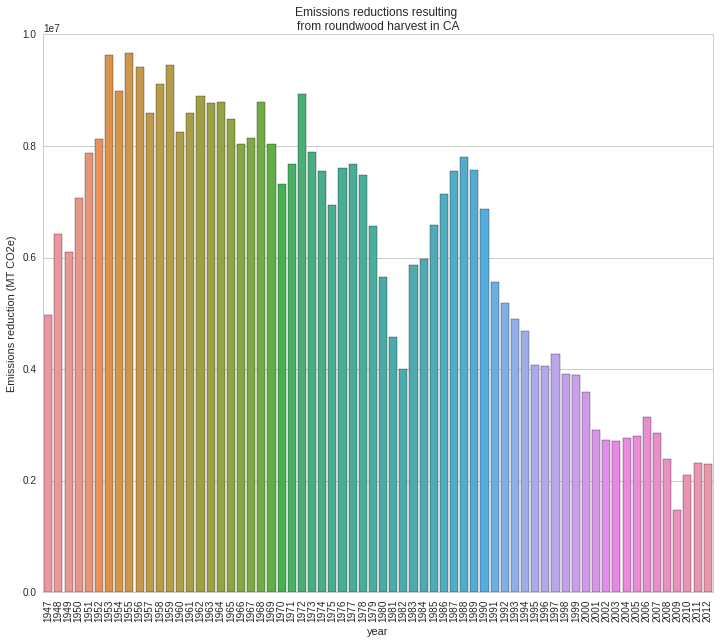

In [36]:
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize=(12, 10))
ax2 = sns.barplot(x ='year', y='erTotal', data=mm_histHarvest.sort_values('year'))
ax2.set_ylabel('Emissions reduction (MT CO2e)')
ax2.set_title('Emissions reductions resulting \nfrom roundwood harvest in CA')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

In [37]:
[fig2.savefig('graphics/ann_hh_em_reduc.{}'.format(i)) for i in ['pdf','png']]

[None, None]

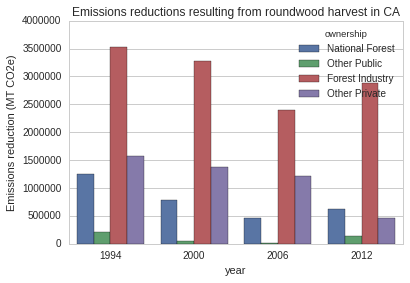

In [38]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax = sns.barplot(x ='year', y='erTotal', hue="ownership", data=tpoData.sort_values('year'))
ax.set_ylabel('Emissions reduction (MT CO2e)')
ax.set_title('Emissions reductions resulting from roundwood harvest in CA')

In [39]:
[fig.savefig('graphics/harv_em_reductions.{}'.format(i)) for i in ['pdf','png']]

[None, None]

Total emissions reductions from roundwood harvesting in CA, 2012

In [40]:
pd.read_sql('select sum("erTotal") from tpo_emreduc where year = "2012"', sqdb['cx'])

,"sum(""erTotal"")"
0,4105541.16538


### Emissions from un-utilized logging residuals
From logging residuals not used in bioenergy, emmisions are produced from combustion of the residual material or from decomposition of the material over time. To calculate the ratio of burned to decompsed logging residues I begin with the CARB estimate of PM2.5 produced from forest management:

In [41]:
tName = 'cpe_allyears'
sqdb['crs'].executescript('drop table if exists {0};'.format(tName))
for y in [2000, 2005, 2010, 2012, 2015]:
    url = 'http://www.arb.ca.gov/app/emsinv/2013/emsbyeic.csv?F_YR={0}&F_DIV=0&F_SEASON=A&SP=2013&SPN=2013_Almanac&F_AREA=CA'
    df = pd.read_csv(url.format(y))
    df.to_sql(tName, sqdb['cx'], if_exists = 'append')

In [42]:
pmAnn = pd.read_sql('''
                        select year,
                                eicsoun,
                                "PM2_5"*365 an_pm25_av
                        from cpe_allyears
                        where eicsoun = 'FOREST MANAGEMENT';
                    ''', sqdb['cx'])
pmAnn

,YEAR,EICSOUN,an_pm25_av
0,2000,FOREST MANAGEMENT,5474.3065
1,2005,FOREST MANAGEMENT,5474.3065
2,2010,FOREST MANAGEMENT,5474.3065
3,2012,FOREST MANAGEMENT,5477.2995
4,2015,FOREST MANAGEMENT,5480.5115


#### Estimate biomass, CO2, CH4 and BC from PM2.5
To estimate total biomass from PM2.5 I assume 90% consumption of biomass in piles and use the relationship of pile tonnage to PM emissions calculated using the [Piled Fuels Biomass and Emissions Calculator](http://depts.washington.edu/nwfire/piles/) provided by the Washington State Department of Natural resources. This calculator is based on the [Consume](http://www.fs.fed.us/pnw/fera/research/smoke/consume/index.shtml) fire behavior model published by the US Forest Service. 

In [43]:
pfbec = pd.read_csv('fera_pile_cemissions.csv', header=1)
ward = ut.gData('13UQtRfNBSJ81PXxbYSnB2LrjHePNcvhJhrsxRBjHpoY', 475419971)
def sp2bio(pm, species = 'PM2.5 (tons)'):
    return pm * (pfbec[species]/pfbec['Pile Biomass (tons)'])

def bioPm(pm):
    return pm * (pfbec['Pile Biomass (tons)']/pfbec['PM2.5 (tons)'])
co2t = lambda x: sp2bio(x,'CO2 (tons)')
ch4t = lambda x: sp2bio(x,'CH4 (tons)')

pmAnn['biomass_t']=pmAnn.an_pm25_av.apply(bioPm)
pmAnn['co2_t'] = pmAnn.biomass_t.apply(co2t)
pmAnn['ch4_t'] = pmAnn.biomass_t.apply(ch4t)
pmAnn['ch4_co2e'] = pmAnn.ch4_t * 56
pmAnn['bc_co2e']= pmAnn.an_pm25_av.apply(ut.pm2bcgwpPiles)
pmAnn['t_co2e']= pmAnn.co2_t + pmAnn.ch4_co2e + pmAnn.bc_co2e

print tabulate(pmAnn[['YEAR','EICSOUN','co2_t','ch4_co2e','bc_co2e','t_co2e']], headers = ['Year','Emissions source','CO2 (t)', 'CH4 (tCO2e)', 'BC (tCO2e)', 'Pile Burn Total (tCO2e)'],tablefmt="pipe")

|    |   Year | Emissions source   |     CO2 (t) |   CH4 (tCO2e) |   BC (tCO2e) |   Pile Burn Total (tCO2e) |
|---:|-------:|:-------------------|------------:|--------------:|-------------:|--------------------------:|
|  0 |   2000 | FOREST MANAGEMENT  | 1.34928e+06 |        127280 |       248255 |               1.72481e+06 |
|  1 |   2005 | FOREST MANAGEMENT  | 1.34928e+06 |        127280 |       248255 |               1.72481e+06 |
|  2 |   2010 | FOREST MANAGEMENT  | 1.34928e+06 |        127280 |       248255 |               1.72481e+06 |
|  3 |   2012 | FOREST MANAGEMENT  | 1.35002e+06 |        127349 |       248391 |               1.72576e+06 |
|  4 |   2015 | FOREST MANAGEMENT  | 1.35081e+06 |        127424 |       248536 |               1.72677e+06 |


#### Estimating GHG emissions from decomposition of unitilized logging slash
To provide a full picture of the emissions from residual material produced from commercial timber harvesting in California, decomposition of unutilized logging residuals left on-site that are not burned must be accounted for. To establish the fraction of logging residue that is left to decompose, residues burned and used in bioenergy are subtracted from the total reported by the TPO:
![bio_decomp](http://mathurl.com/h5ns5j4.png)

To calculate the GHG emissions from decomposition of piles we use the following equation:

![gwp_decomp](http://mathurl.com/jzspdak.png)

In [44]:
annLrAvg = pd.read_sql('''with ann as (select sum(loggingresidues) lr
                                                        from tpo
                                                        group by year)
                                                    select avg(lr) foo
                                                    from ann;''', sqdb['cx'])['foo'][0]
pctLR_bio = (np.average(pmAnn.biomass_t)/1e6)/annLrAvg

In [45]:
annLrAvg

115.47500000000001

In [46]:
pmAnn

,YEAR,EICSOUN,an_pm25_av,biomass_t,co2_t,ch4_t,ch4_co2e,bc_co2e,t_co2e
0,2000,FOREST MANAGEMENT,5474.3065,901120.411523,1349279.491835,2272.850958,127279.653646,248254.982385,1724814.127867
1,2005,FOREST MANAGEMENT,5474.3065,901120.411523,1349279.491835,2272.850958,127279.653646,248254.982385,1724814.127867
2,2010,FOREST MANAGEMENT,5474.3065,901120.411523,1349279.491835,2272.850958,127279.653646,248254.982385,1724814.127867
3,2012,FOREST MANAGEMENT,5477.2995,901613.086420,1350017.191400,2274.093607,127349.242004,248390.712301,1725757.145705
4,2015,FOREST MANAGEMENT,5480.5115,902141.810700,1350808.868981,2275.427182,127423.922194,248536.373675,1726769.164850


In [47]:
lr_t = 1e6*tpoData.loggingresidues*constants['wDens']['value']/2204.62
tpoData['unused_lr'] = 1e6*(lr_t-(pctLR_bio*lr_t))
tpoData['burned_lr'] = 1e6*lr_t*(np.average(pmAnn.biomass_t)/(annLrAvg*1e6))
tpoData['unburned_lr'] = (lr_t*1e6) - tpoData.bioe_t - tpoData.burned_lr
tpoData['unburned_lr_co2e'] = tpoData.unburned_lr.apply(ut.co2eDecomp)
tpoData

,ownership,roundwoodproducts,loggingresidues,year,erWPu,erWPo,erTotal,bioe_pct,bioe_t,unused_lr,burned_lr,unburned_lr,unburned_lr_co2e
0,National Forest,72.4,20.7,2012,123154.043886,502474.423768,625628.467654,0.047333,12417.792815,2.602998e+11,2.047944e+09,2.602998e+11,7.353469e+11
1,Other Public,16.2,3.4,2012,37539.890544,104350.908575,141890.799119,0.047333,2039.637467,4.275456e+10,3.363773e+08,4.275455e+10,1.207816e+11
2,Forest Industry,328.9,72.4,2012,726659.692498,2147311.487009,2873971.179506,0.047333,43432.280184,9.104205e+11,7.162858e+09,9.104205e+11,2.571938e+12
3,Other Private,53.0,11.2,2012,121976.342427,342074.376674,464050.719101,0.047333,6718.805774,1.408385e+11,1.108066e+09,1.408385e+11,3.978688e+11
4,National Forest,52.8,16.3,2006,83180.615691,371814.969847,454995.585538,0.047333,9778.261975,2.049704e+11,1.612632e+09,2.049704e+11,5.790413e+11
5,Other Public,1.1,0.3,2006,1961.579913,7561.059238,9522.639151,0.047333,179.968012,3.772461e+09,2.968035e+07,3.772461e+09,1.065720e+10
6,Forest Industry,274.3,59.6,2006,613970.133470,1784412.231263,2398382.364733,0.047333,35753.645013,7.494622e+11,5.896496e+09,7.494622e+11,2.117231e+12
7,Other Private,139.2,33.2,2006,283845.672130,927987.019453,1211832.691583,0.047333,19916.459974,4.174857e+11,3.284625e+09,4.174856e+11,1.179397e+12
8,National Forest,90.8,22.6,2000,177421.051116,611583.014373,789004.065489,0.047333,13557.590223,2.841920e+11,2.235920e+09,2.841920e+11,8.028425e+11
9,Other Public,5.2,1.6,2000,8219.181949,36596.162514,44815.344463,0.047333,959.829396,2.011979e+10,1.582952e+08,2.011979e+10,5.683841e+10


### Biomass residuals from non-commercial management activities
Data from TPO does not account for forest management activities that do not result in commercial products (timber sales, biomass sales). To estimate the amount of residual material produced from non commercial management activities we use data from the US Forest Service (FACTS) and from CalFires timber harvest plan data. 

#### Forest Service ACtivity Tracking System (FACTS)
Data from TPO does not account for forest management activities that do not result in commercial products (timber sales, biomass sales). We use a range of 10-35 BDT/acre to convert acres reported in FACTS to volume.

In [48]:
pd.read_excel('lf/FACTS_Tabular_092115.xlsx', sheetname = 'CategoryCrosswalk').to_sql('facts_cat', sqdb['cx'], if_exists = 'replace')
pd.read_csv('pd/facts_notimber.csv').to_sql('facts_notimber', sqdb['cx'], if_exists='replace')

#### Querying FACTS
The USFS [reports](http://data.fs.usda.gov/geodata/edw/datasets.php?dsetParent=Activities) Hazardous Fuels Treatment (HFT) activities as well as Timber Sales (TS) derived from the FACTS database. We use these two datasets to estimate the number of acres treated that did not produce commercial material (sawlogs or biomass) and where burning was not used. The first step is to elimina all treatments in the HFT dataset that included timber sales. We accomplish this by eliminating all rows in the HFT dataset that have identical `FACTS_ID` fields in the TS dataset. We further filter the HFT dataset by removing any planned but not executed treatements (`nbr_units1 >0` below -- `nbr_units1` references `NBR_UNITS_ACCOMPLISHED` in the USFS dataset, see metadata for HFT [here](http://data.fs.usda.gov/geodata/edw/edw_resources/meta/S_USA.Activity_HazFuelTrt_PL.xml)), and use text matching in the 'ACTIVITY' and 'METHOD' fields to remove any rows that contain reference to 'burning' or 'fire'. Finally, we remove all rows that that reference 'Biomass' in the method category as it is assumed that this means material was removed for bioenergy.

In [ ]:
usfs_acres = pd.read_sql('''select
                                sum(nbr_units1) acres,
                                method,
                                strftime('%Y',date_compl) year,
                                cat."ACTIVITY" activity,
                                cat."TENTATIVE_CATEGORY" r5_cat
                            from facts_notimber n 
                                join facts_cat cat
                                    on (n.activity = cat."ACTIVITY") 
                            where date_compl is not null
                                and nbr_units1 > 0
                                and cat."TENTATIVE_CATEGORY" != 'Burning'
                                and cat."ACTIVITY" not like '%ire%'
                                and method not like '%Burn%'
                                and method != 'Biomass'
                            group by cat."ACTIVITY",
                                year,
                                method,
                                cat."TENTATIVE_CATEGORY"
                            order by year;''', con = sqdb['cx'])

#### Converting acres to cubic feet
FACTS reports in acres. To estimate the production of biomass from acres treated we use a range of 10-35 BDT/acre. We assume that actual biomass residuals per acre are normally distributed with a mean of 22.5 and a standard deviation of (35-10)/4 = 6.25 

In [ ]:
def sumBDT(ac, maxbdt = 35, minbdt = 10):
    av = (maxbdt + minbdt)/2
    stdev = (float(maxbdt) - float(minbdt))/4 
    d_frac = (ac-np.floor(ac))*np.random.normal(av, stdev, 1).clip(min=0)[0]
    t_bdt = np.sum(np.random.normal(av,stdev,np.floor(ac)).clip(min=0))
    return d_frac+t_bdt

In [ ]:
usfs_acres['bdt'] = usfs_acres['acres'].apply(sumBDT)
usfs_an_bdt = usfs_acres.groupby(['year']).sum()

#### Weighted average wood density
Average wood density weighted by harvested species percent. Derived from McIver and Morgan,  [Table 4](https://docs.google.com/spreadsheets/d/138FWlGeW57MKdcz2UkWxtWV4o50SZO8sduB1R6JOFp8/edit#gid=393414465)

In [ ]:
wood_dens = ut.gData('138FWlGeW57MKdcz2UkWxtWV4o50SZO8sduB1R6JOFp8', 1297253755)
wavg_dens =sum(wood_dens.pct/100 * wood_dens.density_lbscuft)

### Annual unutilized management residuals
- [x] Public lands non-commercial management residuals 
- [ ] Private land non-commercial management residuals
- [x] Public lands logging residuals
- [x] Private lands logging residuals

In [ ]:
cat_codes = {'nf_ncmr': 'Unburned, non-commercial management residuals from National Forest lands',
             'nf_lr': 'Logging residuals generated from timber sales on National Forest lands',
             'opriv_lr': 'Logging residuals generated from timber sales on non-industrial private forest lands',
             'fi_lr': 'Logging residuals generated from timber sales on industrial private lands',
             'opub_lr': 'Logging residuals generated from timber sales on industrial private lands'}

In [ ]:
usfs_an_bdt['cuft']= usfs_an_bdt.bdt *wavg_dens
resid_stats=pd.DataFrame((usfs_an_bdt.iloc[6:,2]/1000000).describe())
resid_stats.columns = ['nf_ncmr']
resid_stats['nf_lr']=tpoData[tpoData.ownership.str.contains('National Forest')]['loggingresidues'].describe()
resid_stats['opriv_lr']=tpoData[tpoData.ownership.str.contains('Other Private')]['loggingresidues'].describe()
resid_stats['fi_lr']=tpoData[tpoData.ownership.str.contains('Forest Industry')]['loggingresidues'].describe()
resid_stats['opub_lr']=tpoData[tpoData.ownership.str.contains('Other Public')]['loggingresidues'].describe()
resid_stats

In [ ]:
print tabulate(resid_stats, headers = resid_stats.columns.tolist(), tablefmt ='pipe')

#### Estimating combined GHG and SLCP emissions from unutilized residues
Only a fraction of the

In [ ]:
ureg = UnitRegistry()
ureg.define('cubic foot =  cubic_centimeter/ 3.53147e-5 = cubic_foot' )
ureg.define('million cubic foot =  cubic_foot*1000000 = MMCF' )
ureg.define('board foot sawlog = cubic_foot / 5.44 = BF_saw')
ureg.define('board foot veneer = cubic_foot / 5.0 = BF_vo')
ureg.define('board foot bioenergy = cubic_foot / 1.0 = BF_bio')
ureg.define('bone-dry unit = cubic_foot * 96 = BDU')
